In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/1dllb.csv")

In [ ]:
data.head()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [ ]:
data.columns

Index(['Transaction Date and Time', 'Transaction Amount', 'Cardholder Name',
       'Card Number (Hashed or Encrypted)', 'Merchant Name',
       'Merchant Category Code (MCC)',
       'Transaction Location (City or ZIP Code)', 'Transaction Currency',
       'Card Type', 'Card Expiration Date', 'CVV Code (Hashed or Encrypted)',
       'Transaction Response Code', 'Transaction ID', 'Fraud Flag or Label',
       'Previous Transactions', 'Transaction Source', 'IP Address',
       'Device Information', 'User Account Information', 'Transaction Notes'],
      dtype='object')

<ipython-input-44-d549c8be2c34>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud Flag or Label', data=data, palette='viridis')


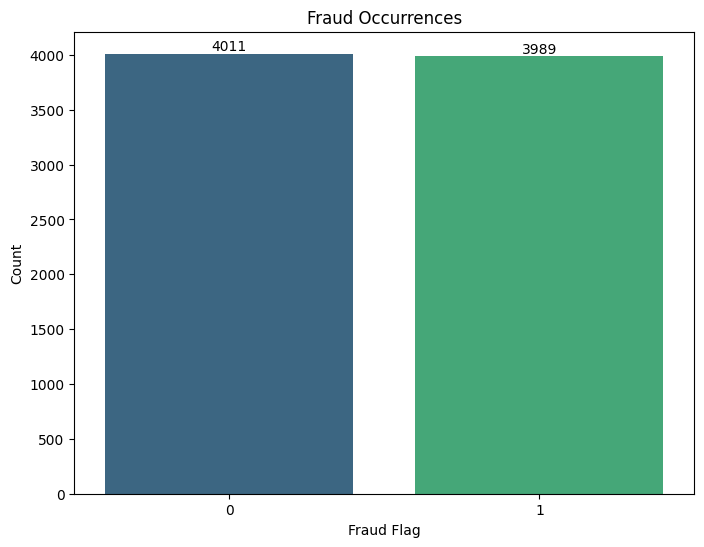

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Fraud Flag or Label', data=data, palette='viridis')
plt.title('Fraud Occurrences')
plt.xlabel('Fraud Flag')
plt.ylabel('Count')

for index, value in enumerate(data['Fraud Flag or Label'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

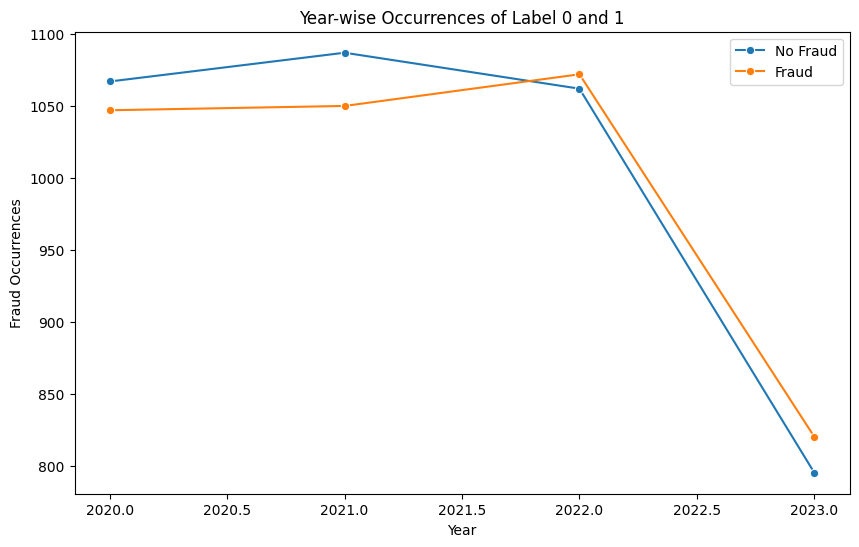

In [ ]:
formated_date = pd.to_datetime(data['Transaction Date and Time'])
data['Year'] = formated_date.dt.year

occurrences = data.groupby(['Year', 'Fraud Flag or Label']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))

sns.lineplot(x='Year', y='Count', data=occurrences[occurrences['Fraud Flag or Label'] == 0], label='No Fraud', marker='o')
sns.lineplot(x='Year', y='Count', data=occurrences[occurrences['Fraud Flag or Label'] == 1], label='Fraud', marker='o')

plt.title('Year-wise Occurrences of Label 0 and 1')
plt.xlabel('Year')
plt.ylabel('Fraud Occurrences')
plt.legend()
plt.show()

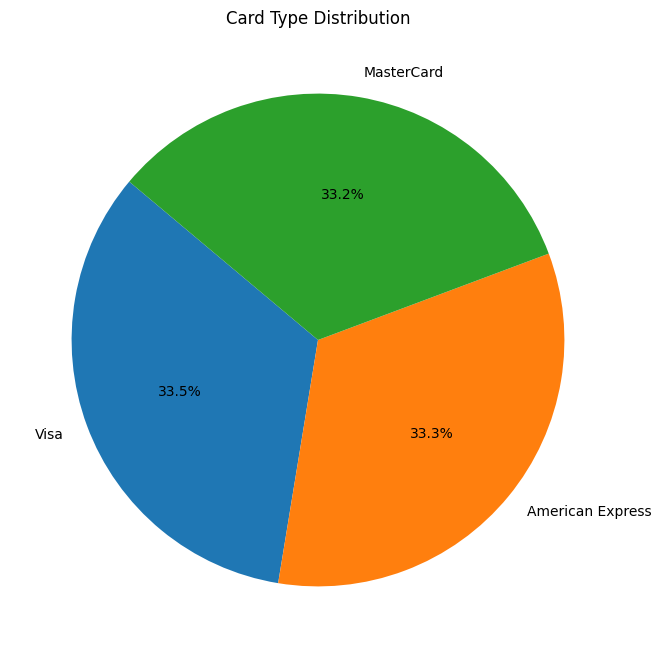

In [ ]:
card_type_counts = data['Card Type'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Card Type Distribution')
plt.show()


In [ ]:
data = data.drop(columns=['Transaction Location (City or ZIP Code)','Transaction ID','Transaction Notes','Cardholder Name','Merchant Name','User Account Information','Device Information','IP Address','CVV Code (Hashed or Encrypted)','Card Expiration Date','Card Number (Hashed or Encrypted)','Previous Transactions'])

In [ ]:
data.head()

,Transaction Date and Time,Transaction Amount,Merchant Category Code (MCC),Transaction Currency,Card Type,Transaction Response Code,Fraud Flag or Label,Transaction Source,Year
0,2022-09-24 13:54:27,285.88,3590,INR,MasterCard,5,1,Online,2022
1,2020-07-24 11:20:13,1777.32,7277,EUR,American Express,12,1,Online,2020
2,2023-03-18 01:05:36,3939.01,9297,USD,Visa,5,1,In-Person,2023
3,2021-01-07 21:53:04,376.44,5686,USD,Visa,5,0,In-Person,2021
4,2021-12-16 06:22:24,1687.33,2940,INR,MasterCard,5,1,Online,2021


In [ ]:
data.isnull().sum()

Transaction Date and Time       0
Transaction Amount              0
Merchant Category Code (MCC)    0
Transaction Currency            0
Card Type                       0
Transaction Response Code       0
Fraud Flag or Label             0
Transaction Source              0
Year                            0
dtype: int64

In [ ]:
data['Card Type'].unique()

array(['MasterCard', 'American Express', 'Visa'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


label_encoder = LabelEncoder()
data['Transaction Source'] = label_encoder.fit_transform(data['Transaction Source'])
data['Card Type'] = label_encoder.fit_transform(data['Card Type'])
data['Transaction Currency'] = label_encoder.fit_transform(data['Transaction Currency'])
data['Transaction Response Code'] = label_encoder.fit_transform(data['Transaction Response Code'])
print(data)

     Transaction Date and Time  Transaction Amount  \
0          2022-09-24 13:54:27              285.88   
1          2020-07-24 11:20:13             1777.32   
2          2023-03-18 01:05:36             3939.01   
3          2021-01-07 21:53:04              376.44   
4          2021-12-16 06:22:24             1687.33   
...                        ...                 ...   
7995       2020-12-17 20:36:48             2214.15   
7996       2022-07-04 05:19:11              675.97   
7997       2022-08-14 19:14:45              918.28   
7998       2021-05-16 18:21:52             3035.31   
7999       2023-06-14 06:12:26             3354.36   

      Merchant Category Code (MCC)  Transaction Currency  Card Type  \
0                             3590                     1          1   
1                             7277                     0          0   
2                             9297                     2          2   
3                             5686                     2          2

In [ ]:
data['Transaction Date and Time'] = pd.to_datetime(data['Transaction Date and Time'], errors='coerce')

In [ ]:
data['Year'] = data['Transaction Date and Time'].dt.year
data['Month'] = data['Transaction Date and Time'].dt.month
data['Day'] = data['Transaction Date and Time'].dt.day
data['Hour'] = data['Transaction Date and Time'].dt.hour
data['Minute'] = data['Transaction Date and Time'].dt.minute


data = data.drop(columns=['Transaction Date and Time'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


scaler = MinMaxScaler()
columns = ['Transaction Amount', 'Merchant Category Code (MCC)','Year','Month','Day','Hour','Minute']

data[columns] = scaler.fit_transform(data[columns])

data.head()


,Transaction Amount,Merchant Category Code (MCC),Transaction Currency,Card Type,Transaction Response Code,Fraud Flag or Label,Transaction Source,Year,Month,Day,Hour,Minute
0,0.057008,0.287810,1,1,1,1,1,0.666667,0.727273,0.766667,0.565217,0.915254
1,0.355558,0.697522,0,0,2,1,1,0.000000,0.545455,0.766667,0.478261,0.338983
2,0.788276,0.921991,2,2,1,1,0,1.000000,0.181818,0.566667,0.043478,0.084746
3,0.075136,0.520725,2,2,1,0,0,0.333333,0.000000,0.200000,0.913043,0.898305
4,0.337544,0.215580,1,1,1,1,1,0.333333,1.000000,0.500000,0.260870,0.372881


In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['Fraud Flag or Label'])
y = data['Fraud Flag or Label']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
data.head()

,Transaction Amount,Merchant Category Code (MCC),Transaction Currency,Card Type,Transaction Response Code,Fraud Flag or Label,Transaction Source,Year,Month,Day,Hour,Minute
0,0.057008,0.287810,1,1,1,1,1,0.666667,0.727273,0.766667,0.565217,0.915254
1,0.355558,0.697522,0,0,2,1,1,0.000000,0.545455,0.766667,0.478261,0.338983
2,0.788276,0.921991,2,2,1,1,0,1.000000,0.181818,0.566667,0.043478,0.084746
3,0.075136,0.520725,2,2,1,0,0,0.333333,0.000000,0.200000,0.913043,0.898305
4,0.337544,0.215580,1,1,1,1,1,0.333333,1.000000,0.500000,0.260870,0.372881


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)


mlp_classifier.fit(xtrain, ytrain)


y_pred = mlp_classifier.predict(xtest)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'hidden_layer_sizes': [(50, 25), (100, 50)],
    'max_iter': [500, 1000],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01]
}

random_search = RandomizedSearchCV(mlp_classifier, param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(xtrain, ytrain)

print("Best Hyperparameters:", random_search.best_params_)
best_mlp_classifier = random_search.best_estimator_
best_mlp_classifier.fit(xtrain, ytrain)

y_pred = best_mlp_classifier.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Hyperparameters: {'solver': 'sgd', 'max_iter': 500, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (50, 25)}
Accuracy: 0.52


Accuracy: 0.51
Precision: 0.52
Recall: 0.56
F1-score: 0.54
ROC-AUC: 0.52


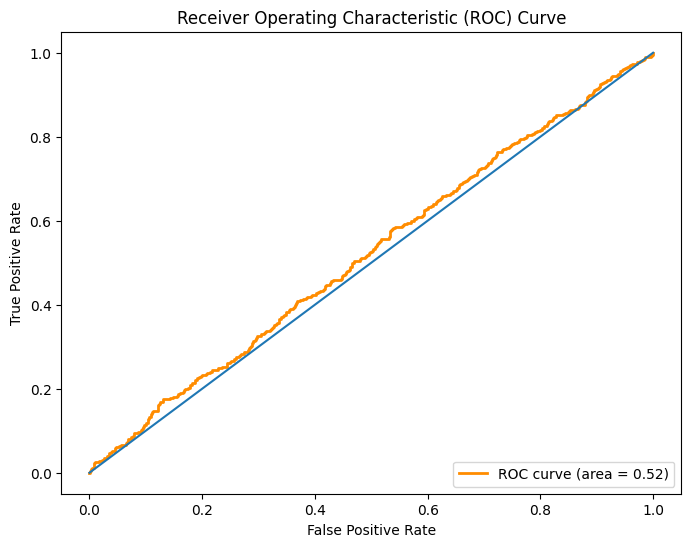

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve


accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(ytest, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(ytest, y_pred)
print(f"Recall: {recall:.2f}")

f1 = f1_score(ytest, y_pred)
print(f"F1-score: {f1:.2f}")

roc_auc = roc_auc_score(ytest, mlp_classifier.predict_proba(xtest)[:, 1])
print(f"ROC-AUC: {roc_auc:.2f}")


fpr, tpr, _ = roc_curve(ytest, mlp_classifier.predict_proba(xtest)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
conf_matrix = confusion_matrix(ytest, y_pred)
print(conf_matrix)



[[370 423]
 [354 453]]


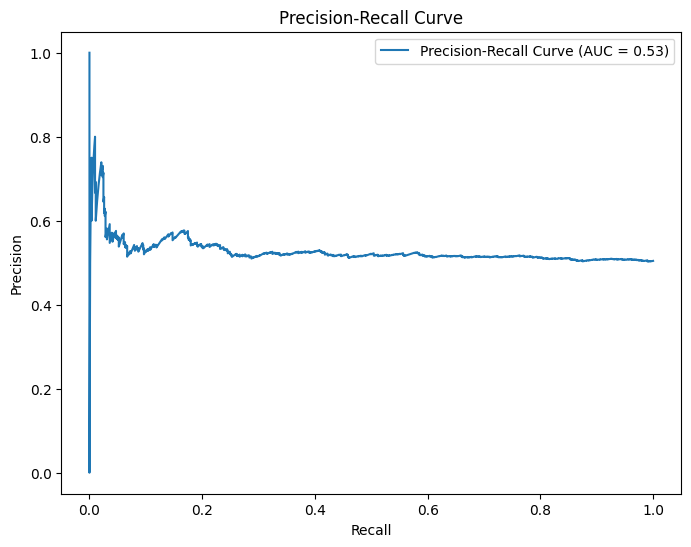

In [ ]:
# Plot Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(ytest, mlp_classifier.predict_proba(xtest)[:, 1])
area_under_curve = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()